# Spread of infection 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [2]:
airports_file = "../csv/infection/US_airport.csv"
airports = pd.read_csv(airports_file, index_col=0)

flights_file = "../csv/infection/flights.csv"
flights = pd.read_csv(flights_file, sep=" ")

In [3]:
flights

,Source,Destination,StartTime,EndTime,Duration
0,0,1,1229286900,1229291520,4620
1,0,1,1229272800,1229277300,4500
2,0,2,1229285640,1229291520,5880
3,0,3,1229268060,1229276040,7980
4,0,3,1229284740,1229293140,8400
...,...,...,...,...,...
180187,260,24,1230066420,1230070440,4020
180188,260,24,1230049200,1230052620,3420
180189,260,16,1230059400,1230064200,4800
180190,260,16,1230035400,1230040200,4800


### Всего у нас 10 дней перелетов

In [4]:
from datetime import datetime

print("First flight: ", datetime.fromtimestamp(flights["StartTime"].min()))
print("Last flight: ", datetime.fromtimestamp(flights["EndTime"].max()))

First flight:  2008-12-14 08:05:00
Last flight:  2008-12-24 17:20:00


In [5]:
airports

,symbol,airport name,city,latitude,longitude,xcoordviz,ycoordviz
id,,,,,,,
0,ABE,Lehigh Valley Intl,Allentown,40.652083,-75.440806,1.926093e+06,337357.529978
1,CLE,Cleveland Hopkins Intl,Cleveland,41.411689,-81.849794,1.384469e+06,302554.338074
2,CLT,Charlotte Douglas Intl,Charlotte,35.214000,-80.943139,1.590611e+06,-355004.415565
3,ORD,Chicago Ohare Intl,Chicago,41.978603,-87.904842,8.790187e+05,289127.727396
4,ATL,Hartsfield Jackson Atlanta Intl,Atlanta,33.636719,-84.428067,1.306257e+06,-582505.812325
...,...,...,...,...,...,...,...
274,RDD,Redding Muni,Redding,40.509000,-122.293389,-1.976890e+06,334403.078441
275,SUN,Friedman Mem,Hailey,43.504444,-114.296194,-1.261565e+06,515731.793677
276,TWF,Magic Valley Regional Airport,Twin Falls,42.481803,-114.487733,-1.296508e+06,406881.420680


In [6]:
print(len(flights['Destination'].unique()))
print(len(flights['Source'].unique()))

279
279


### В каждый город есть рейс, и из каждого города есть рейс. Т.е. наш граф является связным. (В рамках нашей задачи это значит, что все города могут быть заражены)
### Напишем функцию распростарнения инфекции.

In [7]:
def get_airport_code(airports, index):
    return airports.at[index, 'symbol']

def spread(dataset, airports, init_city = 'ABE', p = 0.5, verbose=False):
    infected_city_codes = set([init_city])
    result = {dataset['StartTime'].min() : [init_city]}
    if verbose:
        print("p = {}, init_city = {}".format(p, init_city))
        print("Starting infection...")
    
    for index, flight in dataset.iterrows():
        if get_airport_code(airports, flight['Source']) in infected_city_codes:
            if np.random.random() <= p:
                destination = get_airport_code(airports, flight['Destination'])
                if destination in infected_city_codes:
                    continue
                if verbose:
                    print("Infecting city with code {}".format(destination))
                infection_time = flight['EndTime']
                if infection_time in result:
                    result[infection_time].append(destination)
                else:
                    result[infection_time] = [destination]
                infected_city_codes.add(destination)
    return result

In [8]:
infection_spread = spread(flights, airports, verbose=True)

p = 0.5, init_city = ABE
Starting infection...
Infecting city with code CLE
Infecting city with code ORD
Infecting city with code ATL
Infecting city with code DTW
Infecting city with code DEN
Infecting city with code IAD
Infecting city with code PIT
Infecting city with code AUS
Infecting city with code CHA
Infecting city with code PHL
Infecting city with code MOB
Infecting city with code BUF
Infecting city with code BNA
Infecting city with code JAN
Infecting city with code PNS
Infecting city with code CLT
Infecting city with code RSW
Infecting city with code LGA
Infecting city with code FLL
Infecting city with code IAH
Infecting city with code LAX
Infecting city with code SFO
Infecting city with code LAS
Infecting city with code JFK
Infecting city with code MCO
Infecting city with code RDU
Infecting city with code MSP
Infecting city with code SLC
Infecting city with code SJU
Infecting city with code EWR
Infecting city with code RIC
Infecting city with code TPA
Infecting city with code 

In [9]:
import itertools

def infection_report(airports, infection_spread):
    flatten = list(itertools.chain.from_iterable(infection_spread.values()))
    print("In total {} of {} cities was infected".format(len(flatten), len(airports['symbol'].unique())))

In [10]:
infection_report(airports, infection_spread)

In total 277 of 279 cities was infected


In [11]:
from tqdm import notebook



probabilities = [0.01, 0.05, 0.1, 0.5, 1.]
results = {}

for p in notebook.tqdm(probabilities):
    results[p] = []
    for i in notebook.tqdm(range(10)):
        results[p].append(spread(flights, airports, p = p))

In [12]:
import pickle

file_path = 'file_path'

with open(file_path, 'wb') as f:
    pickle.dump(results, f)

# with open(file_path, 'rb') as f:
#     results = pickle.load(f)

In [13]:
for res in results[1]:
    infection_report(airports, res)

In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected
In total 279 of 279 cities was infected


### Пройдемся по каждому 12-ти часовому отрезку и посчитаем сколько городов к каждому из отрезков было заражено

In [38]:
from datetime import datetime
from dateutil import rrule

def iter_by_12hours(data, interval_start, interval_end):
    total = len(data)
    infected = []
    results = {}
    time_intervals = rrule.rrule(rrule.HOURLY, dtstart=interval_start, until=interval_end)[0::12]
    # Iterate over all 12-hour interval.
    # add all times from data within current interval
    # add this times to those that already infected
    # divide length of infected time list by total count
    for interval_index in range(len(time_intervals)):
        infected_in_interval = []
        if interval_index == 0:
            for x in data:
                if datetime.fromtimestamp(x) <= time_intervals[interval_index]:
                    infected_in_interval.append(x)
        else:
            for x in data:
                if (datetime.fromtimestamp(x) <= time_intervals[interval_index] 
                                          and datetime.fromtimestamp(x) > time_intervals[interval_index - 1]):
                    infected_in_interval.append(x)       
        if len(infected_in_interval) != 0:
            infected.extend(infected_in_interval)
        results[interval_index] = len(infected) / total
    return results


        
probabilities = [0.01, 0.05, 0.1, 0.5, 1.]
start_datetime = datetime.fromtimestamp(flights['StartTime'].min())
end_datetime = datetime.fromtimestamp(flights['EndTime'].max())
time_report = {}
for p in probabilities:
    time_report[p] = {}
    for i in range(10):
        result_for_iteration = iter_by_12hours(results[p][i], start_datetime, end_datetime)    
        time_report[p][i] =  result_for_iteration

In [39]:
def count_avg(data, interval_count = 20, num_of_iter = 10):
    result = {}
    for hour_interval in range(interval_count):
        result[hour_interval] = 0.0
        sum_by_hour = 0
        for iteration in range(num_of_iter):
            sum_by_hour = sum_by_hour + data[iteration][hour_interval]
        result[hour_interval] = sum_by_hour / 10
    return result

avg_reports = {}
for probability in time_report:
    avg_reports[probability] = count_avg(time_report[probability])
    
avg_reports[0.01]

{0: 0.007623661991948219,
 1: 0.01627231064059687,
 2: 0.03248852685681308,
 3: 0.0405966349649212,
 4: 0.05356960793789417,
 5: 0.07718937482332058,
 6: 0.10365247321827095,
 7: 0.13939524143831178,
 8: 0.21654848177193448,
 9: 0.2629849434314119,
 10: 0.3406907463201812,
 11: 0.38876785364481936,
 12: 0.5034165969185193,
 13: 0.5313551579305591,
 14: 0.601596207259337,
 15: 0.631111540613724,
 16: 0.7099374669892196,
 17: 0.7582326031207818,
 18: 0.8425408522588839,
 19: 0.8860976074651308}

### Посмотрим на графики по вероятностям

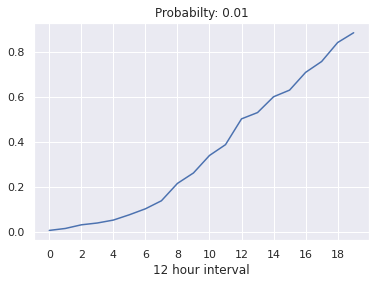

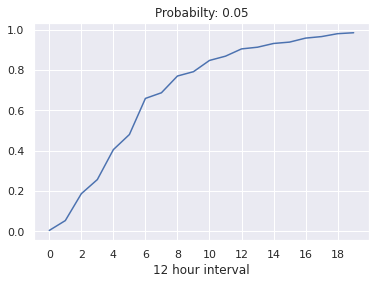

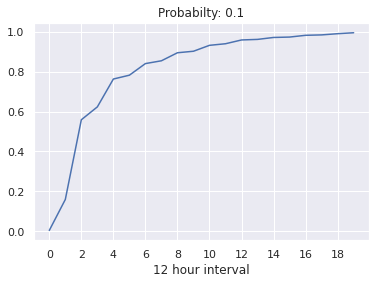

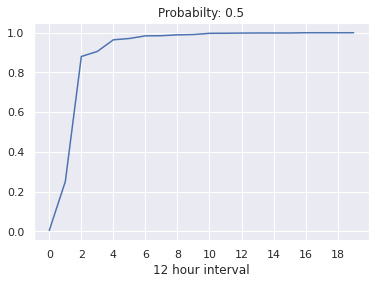

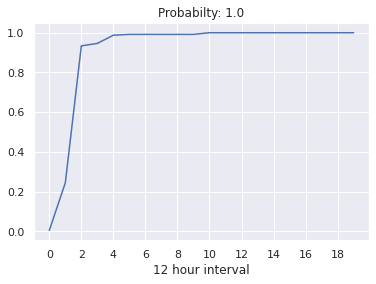

In [40]:
sns.set_theme(style="darkgrid")

for prob in avg_reports:
    s = pd.Series(avg_reports[prob].values(), index=avg_reports[prob].keys())
    sns.lineplot(data=s).set_title("Probabilty: {}".format(prob))
    plt.xlabel('12 hour interval')
    plt.xticks(range(0,20,2))
    plt.show()

### Видно, что уже при вероятности 0.05 через 10 суток почти все города заражены. Графики вероятностей 0.5 и 1 очень похожи и уже через 5 дней все города заражены.

### Теперь построим граф перелетов

In [84]:
flights[(flights['Source'] == 0)][flights['Destination']==1].count()[0]

26

In [85]:
def count_weight(data, first_city_id, second_city_id):
    total = len(data)
    from_first_to_second = flights[(flights['Source'] == first_city_id)][flights['Destination'] == second_city_id].count()[0]
    from_second_to_first = flights[(flights['Source'] == second_city_id)][flights['Destination'] == first_city_id].count()[0]
    return (from_first_to_second + from_second_to_first) / total

In [94]:
import networkx as nx

G = nx.from_pandas_edgelist(flights, source="Source", target="Destination")
weights = []
for i,j in G.edges():
    weight = count_weight(flights, i, j)
    G[i][j]['weight'] = count_weight(flights, i, j)
    weights.append(weight)

<AxesSubplot:>

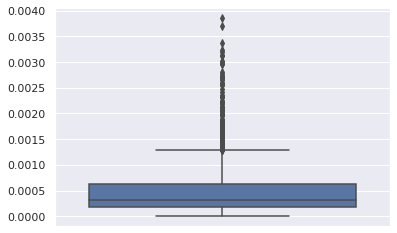

In [99]:
weights = np.array(weights)
sns.boxplot(y=weights)

### Посмотрим на медиану и на максимальное значение перелетов

In [ ]:
print("Mean:",weights.mean() * len(flights))
print("Max:", weights.max() * len(flights))
print("Min:", weights.min() * len(flights))

### Прогоним симуляцию 50 раз

In [ ]:
for_mean_time = []
for i in notebook.tqdm(range(50)):
    for_mean_time.append(spread(flights,airports))

In [ ]:
def swap(dict_to_swap):
    res = {}
    for key, values in dict_to_swap.items():
        for value in values:
            res[value] = key
    return res

In [ ]:
def get_airport_index(airports, code):
    return airports[airports['symbol'] == code].index[0]

### Посчитаем среднее время заражения для каждого из городов.

In [ ]:
airport_infection_times = {}
for airport_code in airports['symbol']:
    airport_infection_times[airport_code] = []

for iteration in for_mean_time:
    for airport, infection_time in swap(iteration).items():
        airport_infection_times[airport].append(infection_time)

for airport in airport_infection_times:
    airport_infection_times[airport] = np.array(airport_infection_times[airport])

In [ ]:
airport_mean = {get_airport_index(airports, airport) : times.mean() - flights['StartTime'].min() for airport, times in airport_infection_times.items()}

In [ ]:
airport_mean

In [ ]:
clustering = nx.clustering(G, weight="weight")
degree = nx.degree(G)
centrality = nx.betweenness_centrality(G)

In [ ]:
df = pd.DataFrame(index=airport_mean.keys(), data=airport_mean.values())
df.rename(columns={0:"Mean_time"}, inplace=True)
df['Clustering'] = dict(sorted(clustering.items())).values()
df['Degree'] = dict(sorted(dict(degree).items())).values()
df['Centrality'] = dict(sorted(centrality.items())).values()
df['Mean_log'] = np.log(df['Mean_time'])
df

In [ ]:
sns.scatterplot(data = df, x='Clustering', y="Mean_time")

In [ ]:
sns.scatterplot(data = df, x='Degree', y="Mean_time")

In [ ]:
sns.scatterplot(data = df, x='Centrality', y="Mean_time")

In [ ]:
from scipy.stats import spearmanr

coef_degree, p = spearmanr(df['Mean_time'], df['Degree'])
coef_centr, p = spearmanr(df['Mean_time'], df['Centrality'])
coef_clust, p = spearmanr(df['Mean_time'], df['Clustering'])

In [ ]:
print("Clustering coef:",coef_clust)
print("Centrality coef:",coef_centr)
print("Degree coef:",coef_degree)

In [ ]:
ax = sns.heatmap(df.corr(method='spearman').abs(),cmap="Blues")

### Видно, что у степени узла коэффициент высокий по модулю (отрицательный потому что зависимость обратная). Вполне логично: чем больше связей у города, тем выше вероятность что в него прилетит зараженный самолет. 
### Так же, довольно высокий коэффициент у кластеризации, это можно объяснить тем, что, если у аэропорта не много соседей, но частое сообщение с какими-то другими аэропортами, то повышается вероятность, что из одного из соседних городов будет занесена инфекция.

In [109]:
### Видно, что у степени узла коэффициент высокий по модулю (отрицательный потому что зависимость обратная). Вполне логично: чем больше связей у города, тем выше вероятность что в него прилетит зараженный самолет. 
### Так же, довольно высокий коэффициент у кластеризации, это можно объяснить тем, что, если у аэропорта не много соседей, но частое сообщение с какими-то другими аэропортами, то повышается вероятность, что из одного из соседних городов будет занесена инфекция.

Mean: 86.29885057471265
Max: 694.0
Min: 1.0


### Прогоним симуляцию 50 раз

In [110]:
for_mean_time = []
for i in notebook.tqdm(range(50)):
    for_mean_time.append(spread(flights,airports))

In [126]:
def swap(dict_to_swap):
    res = {}
    for key, values in dict_to_swap.items():
        for value in values:
            res[value] = key
    return res

In [144]:
def get_airport_index(airports, code):
    return airports[airports['symbol'] == code].index[0]

### Посчитаем среднее время заражения для каждого из городов.

In [127]:
airport_infection_times = {}
for airport_code in airports['symbol']:
    airport_infection_times[airport_code] = []

for iteration in for_mean_time:
    for airport, infection_time in swap(iteration).items():
        airport_infection_times[airport].append(infection_time)

for airport in airport_infection_times:
    airport_infection_times[airport] = np.array(airport_infection_times[airport])

In [154]:
airport_mean = {get_airport_index(airports, airport) : times.mean() - flights['StartTime'].min() for airport, times in airport_infection_times.items()}

In [155]:
airport_mean

{0: 0.0,
 1: 54273.59999990463,
 2: 49560.0,
 3: 49248.0,
 4: 43477.200000047684,
 5: 52369.200000047684,
 6: 67974.0,
 7: 52653.59999990463,
 8: 57494.40000009537,
 9: 49560.0,
 10: 36627.59999990463,
 11: 51144.0,
 12: 52387.200000047684,
 13: 61729.200000047684,
 14: 44427.59999990463,
 15: 62979.59999990463,
 16: 65540.40000009537,
 17: 49896.0,
 18: 61520.40000009537,
 19: 47317.200000047684,
 20: 48992.40000009537,
 21: 44529.59999990463,
 22: 73494.0,
 23: 72039.59999990463,
 24: 55682.40000009537,
 25: 65502.0,
 26: 54074.40000009537,
 27: 67830.0,
 28: 50774.40000009537,
 29: 47788.799999952316,
 30: 62616.0,
 31: 49006.799999952316,
 32: 72387.59999990463,
 33: 47324.40000009537,
 34: 57957.59999990463,
 35: 61572.0,
 36: 61812.0,
 37: 62071.200000047684,
 38: 67516.79999995232,
 39: 73940.40000009537,
 40: 513337.241379261,
 41: 101440.79999995232,
 42: 151812.0,
 43: 51000.0,
 44: 53424.0,
 45: 58227.59999990463,
 46: 44611.200000047684,
 47: 60758.40000009537,
 48: 61914.0

In [220]:
clustering = nx.clustering(G, weight="weight")
degree = nx.degree(G)
centrality = nx.betweenness_centrality(G)

In [221]:
df = pd.DataFrame(index=airport_mean.keys(), data=airport_mean.values())
df.rename(columns={0:"Mean_time"}, inplace=True)
df['Clustering'] = dict(sorted(clustering.items())).values()
df['Degree'] = dict(sorted(dict(degree).items())).values()
df['Centrality'] = dict(sorted(centrality.items())).values()
df['Mean_log'] = np.log(df['Mean_time'])
df

,Mean_time,Clustering,Degree,Centrality,Mean_log
0,0.0,0.122561,5,0.000000,-inf
1,54273.6,0.047672,58,0.004675,10.901793
2,49560.0,0.063234,66,0.014125,10.810939
3,49248.0,0.032477,133,0.118203,10.804624
4,43477.2,0.026677,156,0.219629,10.679992
...,...,...,...,...,...
274,51381.6,0.000000,1,0.000000,10.847035
275,43884.0,0.000000,1,0.000000,10.689305
276,43864.8,0.000000,1,0.000000,10.688867
277,238034.4,0.000000,1,0.000000,12.380170


<AxesSubplot:xlabel='Clustering', ylabel='Mean_time'>

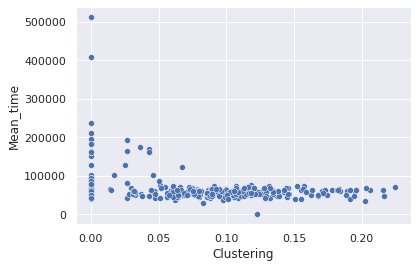

In [222]:
sns.scatterplot(data = df, x='Clustering', y="Mean_time")

<AxesSubplot:xlabel='Degree', ylabel='Mean_time'>

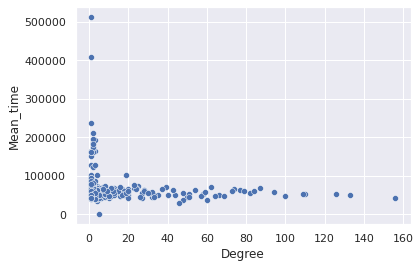

In [223]:
sns.scatterplot(data = df, x='Degree', y="Mean_time")

<AxesSubplot:xlabel='Centrality', ylabel='Mean_time'>

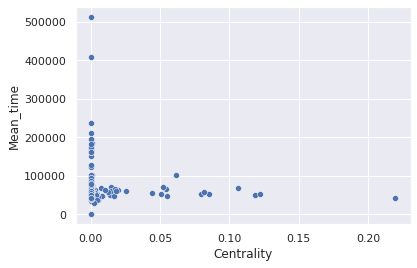

In [224]:
sns.scatterplot(data = df, x='Centrality', y="Mean_time")

In [228]:
from scipy.stats import spearmanr

coef_degree, p = spearmanr(df['Mean_time'], df['Degree'])
coef_centr, p = spearmanr(df['Mean_time'], df['Centrality'])
coef_clust, p = spearmanr(df['Mean_time'], df['Clustering'])

In [229]:
print("Clustering coef:",coef_clust)
print("Centrality coef:",coef_centr)
print("Degree coef:",coef_degree)

Clustering coef: -0.31258899965889564
Centrality coef: -0.2034386145061367
Degree coef: -0.38537563203627845


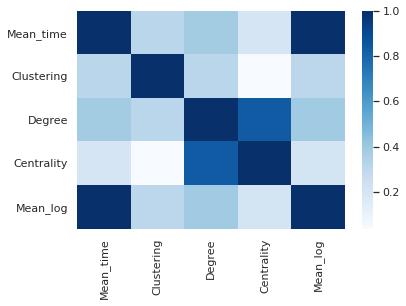

In [230]:
ax = sns.heatmap(df.corr(method='spearman').abs(),cmap="Blues")

### Видно, что у степени узла коэффициент высокий по модулю (отрицательный потому что зависимость обратная). Вполне логично: чем больше связей у города, тем выше вероятность что в него прилетит зараженный самолет. 
### Так же, довольно высокий коэффициент у кластеризации, это можно объяснить тем, что, если у аэропорта не много соседей, но частое сообщение с какими-то другими аэропортами, то повышается вероятность, что из одного из соседних городов будет занесена инфекция.